<a href="https://colab.research.google.com/github/sunnysavita10/Generative-AI-Indepth-Basic-to-Advance/blob/main/Child_to_Parent_Retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

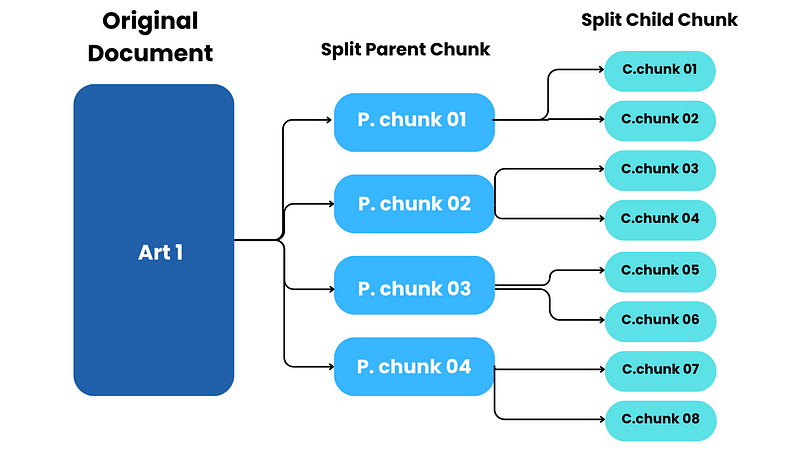

# Parent Document Retriever

which issue this parent-child retrieval will solve.

You may want to have small documents, so that their embeddings can most accurately reflect their meaning. If too long, then the embeddings can lose meaning.

You want to have long enough documents that the context of each chunk is retained.

The ParentDocumentRetriever strikes that balance by splitting and storing small chunks of data. During retrieval, it first fetches the small chunks but then looks up the parent ids for those chunks and returns those larger documents.

Note that "parent document" refers to the document that a small chunk originated from. This can either be the whole raw document OR a larger chunk.

In [1]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 679.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.3/990.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.9/378.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.8/275.8 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [2]:
!pip install -U langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.4 MB/s eta 0:00:00


In [3]:
!pip install sentence-transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [10]:
!pip install langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 4.2 MB/s eta 0:00:00
  

In [11]:
####if you want to use gemini feel free to use this code.

%pip install --upgrade --quiet  google-generativeai langchain-google-genai

# Data Ingestion

In [4]:
from langchain_community.document_loaders import TextLoader

In [5]:
loaders = [
    TextLoader("/content/data/paul_graham_essay.txt"),
    TextLoader("/content/data/state_of_the_union.txt"),
]

In [7]:
docs = []

In [8]:
for loader in loaders:
    docs.extend(loader.load())

In [9]:
docs

[Document(metadata={'source': '/content/data/paul_graham_essay.txt'}, page_content='\t\t\n\nWhat I Worked On\n\nFebruary 2021\n\nBefore college the two main things I worked on, outside of school, were writing and programming. I didn\'t write essays. I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.\n\nThe first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14. The school district\'s 1401 happened to be in the basement of our junior high school, and my friend Rich Draves and I got permission to use it. It was like a mini Bond villain\'s lair down there, with all these alien-looking machines — CPU, disk drives, printer, card reader — sitting up on a raised floor under bright fluorescent lights.\n\nThe language w

In [19]:
# This text splitter is used to create the child documents
from langchain_text_splitters import RecursiveCharacterTextSplitter
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)

In [15]:
from langchain.storage import InMemoryStore
from langchain_chroma import Chroma

**Dataset size:**  Larger datasets generally benefit from more powerful models like MPNet.

**Computational resources:**  If you have limited resources, BGE Small En or MiniLM might be better options.

**Task complexity:**  For complex tasks like question answering or text summarization, MPNet is often preferred.

**Embedding dimensionality:**  Different models produce embeddings of varying dimensions.Choose based on downstream task requirements.

**Performance vs. efficiency trade-off:** Decide if you prioritize high accuracy or faster processing

#####Experimentation is key. Try different models and evaluate their performance on your specific task and dataset to find the best fit.

MTEB: Massive Text Embedding Benchmark

MPNET: Masked and Permuted Pre-training for Language Understanding.

BGE(BAAI general embedding)
BAAI: https://huggingface.co/BAAI

https://huggingface.co/sentence-transformers

https://huggingface.co/spaces/mteb/leaderboard

https://huggingface.co/blog/mteb

#### The all-mpnet-base-v2 model provides the best quality, while all-MiniLM-L6-v2 is 5 times faster and still offers good quality.

In [ ]:
'''# specify embedding model (using huggingface sentence transformer)
from langchain.embeddings import HuggingFaceEmbeddings
embedding_model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {"device": "cuda"}
embeddings = HuggingFaceEmbeddings(
  model_name=embedding_model_name,
  model_kwargs=model_kwargs
)'''

In [13]:
import os
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

from langchain_google_genai import GoogleGenerativeAIEmbeddings
gemini_embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [16]:
vectorstore = Chroma(
    collection_name="full_documents", embedding_function=gemini_embeddings
)

In [17]:
store = InMemoryStore()

In [20]:
from langchain.retrievers import ParentDocumentRetriever
retriever = ParentDocumentRetriever(
    vectorstore=vectorstore,
    docstore=store,
    child_splitter=child_splitter,
)

In [21]:
retriever.add_documents(docs, ids=None)

In [22]:
list(store.yield_keys())

['8f613b54-cd3d-4611-8eee-7a043c52c336',
 'a50a25ca-5f8e-4d89-9ada-f9bfa56b3156']

In [24]:
retrieved_docs= retriever.invoke("What did the president say about Ketanji Brown Jackson")

In [25]:
print(retrieved_docs[0].page_content)

Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  

Last year COVID-19 kept us apart. This year we are finally together again. 

Tonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. 

With a duty to one another to the American people to the Constitution. 

And with an unwavering resolve that freedom will always triumph over tyranny. 

Six days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. 

He thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. 

He met the Ukrainian people. 

From President Zelenskyy to every Ukrainian, their fearlessness, their courage, their determination, inspires the world. 

Groups of citizens blocking tanks with their bodies. Every

In [26]:
print(len(retrieved_docs[0].page_content))

38540


In [27]:
# It should create documents smaller than the parent
child_splitter = RecursiveCharacterTextSplitter(chunk_size=500)

In [28]:
# This text splitter is used to create the parent documents
parent_splitter = RecursiveCharacterTextSplitter(chunk_size=2000)

In [29]:
# The storage layer for the parent documents
store1 = InMemoryStore()

In [30]:
vectorstore1 = Chroma(
    collection_name="full_documents", embedding_function=gemini_embeddings
)

In [31]:
retriever2 = ParentDocumentRetriever(
    vectorstore=vectorstore1,
    docstore=store1,
    child_splitter=child_splitter,
    parent_splitter=parent_splitter,
)

In [32]:
retriever2.add_documents(docs)

In [34]:
len(list(store1.yield_keys()))

66

In [35]:
len(list(store.yield_keys()))

2

In [36]:
retrieved_docs2= retriever2.invoke("What did the president say about Ketanji Brown Jackson")

In [38]:
retrieved_docs2

[Document(metadata={'source': '/content/data/state_of_the_union.txt'}, page_content='In state after state, new laws have been passed, not only to suppress the vote, but to subvert entire elections. \n\nWe cannot let this happen. \n\nTonight. I call on the Senate to: Pass the Freedom to Vote Act. Pass the John Lewis Voting Rights Act. And while you’re at it, pass the Disclose Act so Americans can know who is funding our elections. \n\nTonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service. \n\nOne of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court. \n\nAnd I did that 4 days ago, when I nominated Circuit Court of Appeals Judge Ketanji Brown Jackson. One of our nation’s top legal minds, who will continue Justice Brey

In [37]:
len(retrieved_docs2[0].page_content)

1849

# Data Generation

In [39]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

result = llm.invoke("Write a ballad about LangChain")
print(result.content)

The coder toiled, 'midst screens aglow,
With datasets vast, a tangled flow.
His tools were sharp, his mind was keen,
But still, the knowledge gap was seen.

He dreamt of chains, not forged of steel,
But links of thought, that could reveal,
The secrets hidden, deep inside,
The data's heart, where truths reside.

Then, like a dawn, LangChain took flight,
A beacon bright, in coding's night.
With Python's grace, it wove its spell,
Connecting words, where stories dwell.

No more would data stand alone,
In silos deep, on servers prone.
LangChain would bridge, with logic's art,
Unleashing wisdom, from the start.

It chained the models, one by one,
From GPT's prose, to tasks well done.
It queried, summarized, and more,
Unlocking treasures, unexplored.

The coder smiled, his work complete,
A symphony of code, so neat.
LangChain, his ally, strong and true,
Had made the impossible, come to view.

So sing a song, of code so bright,
That banishes the data's night.
LangChain, we hail your noble ques

In [40]:
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI

qa = RetrievalQA.from_chain_type(llm=llm,
                                 chain_type="stuff",
                                 retriever=retriever2)

query = "What did the president say about Ketanji Brown Jackson"

In [41]:
qa.run(query)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


'The president stated that he nominated Ketanji Brown Jackson to the United States Supreme Court 4 days prior to this speech. He called her "one of our nation\'s top legal minds" and that she would "continue Justice Breyer\'s legacy of excellence." He described her past experience as a former top litigator, a former federal public defender, and someone who comes from a family of public school educators and police officers. He also called her a "consensus builder" who has received a broad range of support. \n'